In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
!gdown 1cBXnfE09NHVQpGr33QpXaZx4ZL8F6Yxd
!gdown 1gFmvsZ0pS2HHCFXOolexncxEGGL5gI_-

Downloading...
From: https://drive.google.com/uc?id=1cBXnfE09NHVQpGr33QpXaZx4ZL8F6Yxd
To: /content/data_orders.csv
100% 572k/572k [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gFmvsZ0pS2HHCFXOolexncxEGGL5gI_-
To: /content/data_offers.csv
100% 9.03M/9.03M [00:00<00:00, 46.1MB/s]


In [23]:
df = pd.read_csv('data_orders.csv')
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


* order_datetime - время заказа
* origin_longitude - долгота
* origin_latitude - широта
* m_order_eta - время до прибытия машины
* order_gk - номер заказа
* order_status_key - статус (4 - отменен клиентом, 9 - отменен системой (reject))
* is_driver_assigned_key - был ли назначен водитель
* cancellations_time_in_seconds - сколько секунд прошло до отмены

In [47]:
pd.to_datetime(df.order_datetime).dt.hour

0        18
1        20
2        12
3        13
4        21
         ..
10711    13
10712    13
10713    13
10714    13
10715    11
Name: order_datetime, Length: 10716, dtype: int64

In [27]:
df.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


Постройте распределение заказов по причинам неуспеха: отмены до и после назначения водителя, режекты

Rejected by system: 0.6818775662560657


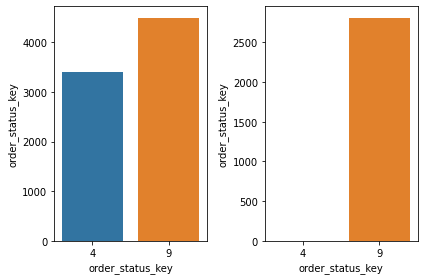

In [164]:
plt.figure()
plt.subplot(121)
sns.barplot(x='order_status_key', y=df[df.is_driver_assigned_key==0].order_status_key.value_counts(), data=df)
plt.subplot(122)
sns.barplot(x='order_status_key', y=df[df.is_driver_assigned_key==1].order_status_key.value_counts(), data=df)
plt.tight_layout()

rej = np.cumsum(df.order_status_key.value_counts())
print(f'Rejected by system: {rej.iloc[0]/rej.iloc[1]}')

In [159]:
df[df.is_driver_assigned_key==1].order_status_key.value_counts()

4    2811
9       3
Name: order_status_key, dtype: int64

Постройте график распределения фейлов по часам - наблюдается ли тендеция, что в какие то часы доля той или иной категории аномально высока?

In [48]:
df['order_hour'] = pd.to_datetime(df.order_datetime).dt.hour

In [66]:
orders = df.groupby(['order_hour', 'order_status_key'])['order_gk'].count().to_frame().rename(columns={'order_gk': 'num_rejects'}).reset_index()

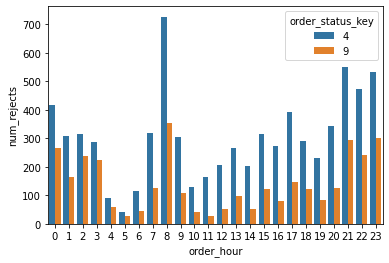

In [67]:
sns.barplot(x='order_hour', y='num_rejects', hue='order_status_key', data=orders)

Постройте графики среднего времени до отмены (cancellations_time_in_seconds) с водителем и без, по часам. Если есть выбросы в данных - лучше удалить. 

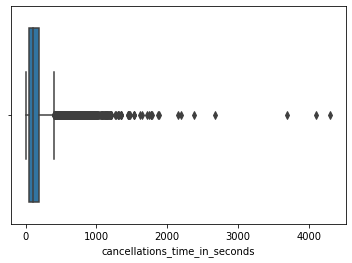

In [69]:
sns.boxplot(x='cancellations_time_in_seconds', data=df)

In [73]:
df.loc[df.cancellations_time_in_seconds > 500, 'order_status_key'].unique()  # cancell big only by user

array([4])

In [74]:
no_driver = df.loc[df.is_driver_assigned_key == 0, ['order_hour', 'cancellations_time_in_seconds', 'order_status_key']]
with_driver = df.loc[df.is_driver_assigned_key == 1, ['order_hour', 'cancellations_time_in_seconds', 'order_status_key']]

In [77]:
no_driver.isna().sum(), len(no_driver)

(order_hour                          0
 cancellations_time_in_seconds    3406
 order_status_key                    0
 dtype: int64, 7902)

In [78]:
with_driver.isna().sum(), len(with_driver)

(order_hour                       0
 cancellations_time_in_seconds    3
 order_status_key                 0
 dtype: int64, 2814)

In [79]:
with_driver.fillna(with_driver.median(), inplace=True)

In [80]:
no_driver.fillna(no_driver.median(), inplace=True)

In [ ]:
with_driver = with_driver.groupby(['order_hour', 'order_status_key'])['cancellations_time_in_seconds'].median().reset_index()
no_driver = no_driver.groupby(['order_hour', 'order_status_key'])['cancellations_time_in_seconds'].median().reset_index()

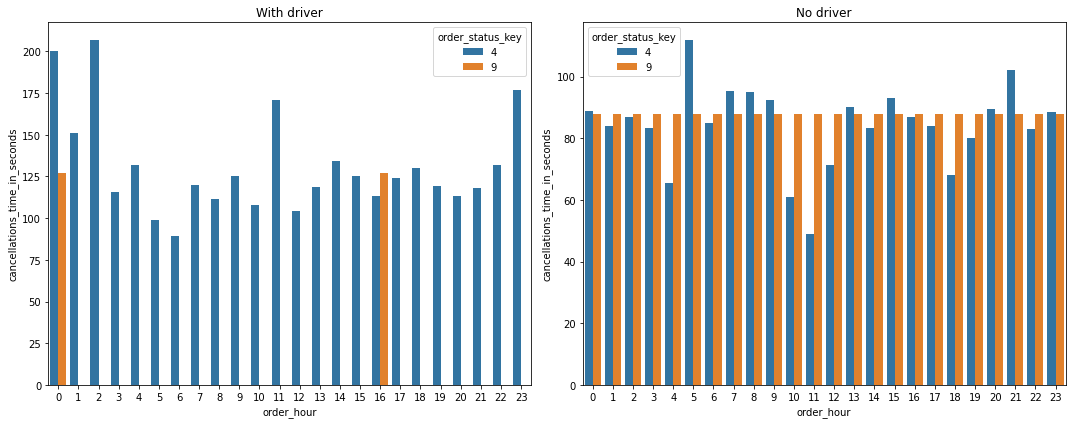

In [85]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('With driver')
sns.barplot(x='order_hour', y='cancellations_time_in_seconds', hue='order_status_key', data=with_driver)
plt.subplot(122)
plt.title('No driver')
sns.barplot(x='order_hour', y='cancellations_time_in_seconds', hue='order_status_key', data=no_driver)
plt.tight_layout()
plt.show()

Постройте распределение среднего ЕТА по часам.

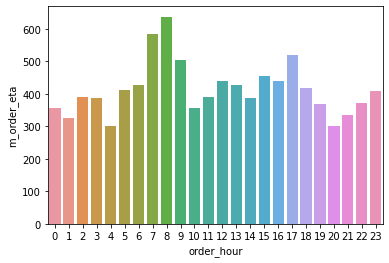

In [86]:
meta = df.groupby(['order_hour'])['m_order_eta'].mean().reset_index()
sns.barplot(x='order_hour', y='m_order_eta', data=meta)

Гексаконы. Воспользовавшись пакетами h3 и folium, посчитайте, сколько гексагонов размера 8 (https://uber.github.io/h3/#/documentation/core-library/resolution-table) содержат 80% всех заказов из исходного датасета и визуализируйте гексагон с наибольшим количеством фейлов на карте.

In [87]:
dfo = pd.read_csv('data_offers.csv')
dfo.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [100]:
import folium
!pip install -qq geopandas geojson
import geopandas as gpd
import geojson

In [91]:
df.head(1)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18


In [93]:
lon, lat = df.origin_longitude.median(), df.origin_latitude.median()

In [98]:
map_ = folium.Map(location= [lat, lon], zoom_start=15, tiles="cartodbpositron")

In [99]:
!pip install -qq h3

     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [104]:
import h3

In [102]:
gdf = gpd.GeoDataFrame(data=df.values, geometry=gpd.points_from_xy(df.origin_longitude, df.origin_latitude))
gdf.head()

,0,1,2,3,4,5,6,7,8,geometry
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18,POINT (-0.97892 51.45617)
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20,POINT (-0.95039 51.45684)
2,12:07:50,-0.96952,51.455544,477.0,3000582891479,4,1,46.0,12,POINT (-0.96952 51.45554)
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13,POINT (-1.05467 51.46054)
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21,POINT (-0.96761 51.45824)


In [105]:
h3_res = 8

def geo_to_h3(row):
    return h3.geo_to_h3(lat=row.origin_latitude, lng=row.origin_longitude, resolution=h3_res)

In [106]:
df['hex'] = df.apply(geo_to_h3, axis=1)

In [117]:
num_orders_per_hex = df.groupby('hex')['order_gk'].count().sort_values(ascending=False)
num_orders_per_hex

hex
88195d2b1dfffff    1497
88195d2b1bfffff     870
88195d2b15fffff     774
88195d2b11fffff     707
88195d2b19fffff     667
                   ... 
88195d281dfffff       1
88195d2821fffff       1
88195d2a1bfffff       1
88195d74d5fffff       1
88195d2a3bfffff       1
Name: order_gk, Length: 144, dtype: int64

In [119]:
len(num_orders_per_hex.iloc[:int(0.8 * len(num_orders_per_hex))])  # num fails = num orders as only 4 and 9 cancellation available

115

In [121]:
geodf = df.groupby('hex')['order_gk'].agg(list).to_frame().reset_index()

In [120]:
from shapely.geometry import Polygon

In [122]:
def add_geometry(row):
    points = h3.h3_to_geo_boundary(row['hex'], True)
    return Polygon(points)

In [123]:
geodf['geometry'] = geodf.apply(add_geometry, axis=1)

In [134]:
geodf['value'] = geodf['order_gk'].str.len()

In [135]:
geodf.sample(5)

,hex,order_gk,geometry,value
94,88195d2b17fffff,"[3000632296817, 3000622794079, 3000622819722, ...",POLYGON ((-0.9709160963176209 51.4488300616488...,210
10,88195d2829fffff,"[3000599837361, 3000585741050, 3000623467797, ...",POLYGON ((-0.9779044831572256 51.4218153032825...,37
116,88195d2b4dfffff,"[3000555146350, 3000555696153]",POLYGON ((-0.9771322192501928 51.4990949187785...,2
70,88195d2a37fffff,"[3000550656073, 3000550631854, 3000578451991, ...","POLYGON ((-0.917353823518131 51.4330474681164,...",23
109,88195d2b3bfffff,"[3000632121951, 3000622793930, 3000622820039, ...",POLYGON ((-0.9832142165311843 51.4508339825528...,115


In [136]:
geodf['order_gk'].str.len().idxmax()

97

In [137]:
target_hex = geodf.loc[geodf.index == 97, :]
target_hex

,hex,order_gk,geometry,value
97,88195d2b1dfffff,"[3000582891479, 3000583140877, 3000582816590, ...",POLYGON ((-0.9674195894273602 51.4623342411263...,1497


In [132]:
from geojson import Feature, Point, FeatureCollection
import json
import matplotlib

In [139]:
def hexagons_dataframe_to_geojson(df_hex, file_output = None, column_name = "value"):
    """
    Produce the GeoJSON for a dataframe, constructing the geometry from the "hex_id" column
    and with a property matching the one in column_name
    """    
    list_features = []
    
    for i,row in df_hex.iterrows():
        try:
            geometry_for_row = { "type" : "Polygon", "coordinates": [h3.h3_to_geo_boundary(h=row["hex"],geo_json=True)]}
            feature = Feature(geometry = geometry_for_row , id=row["hex"], properties = {column_name : row[column_name]})
            list_features.append(feature)
        except:
            print("An exception occurred for hex " + row["hex"]) 

    feat_collection = FeatureCollection(list_features)
    geojson_result = json.dumps(feat_collection)
    return geojson_result

def get_color(custom_cm, val, vmin, vmax):
    return matplotlib.colors.to_hex(custom_cm((val-vmin)/(vmax-vmin)))

def choropleth_map(df_aggreg, column_name = "value", border_color = 'black', fill_opacity = 0.7, color_map_name = "Blues", initial_map = None):
    """
    Creates choropleth maps given the aggregated data. initial_map can be an existing map to draw on top of.
    """    
    #colormap
    min_value = df_aggreg[column_name].min()
    max_value = df_aggreg[column_name].max()
    mean_value = df_aggreg[column_name].mean()
    print(f"Colour column min value {min_value}, max value {max_value}, mean value {mean_value}")
    print(f"Hexagon cell count: {df_aggreg['hex'].nunique()}")
    
    # the name of the layer just needs to be unique, put something silly there for now:
    name_layer = "Choropleth " + str(df_aggreg)
    
    if initial_map is None:
        initial_map = folium.Map(location= [47, 4], zoom_start=5.5, tiles="cartodbpositron")

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg, column_name = column_name)

    # color_map_name 'Blues' for now, many more at https://matplotlib.org/stable/tutorials/colors/colormaps.html to choose from!
    custom_cm = matplotlib.cm.get_cmap(color_map_name)

    folium.GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': get_color(custom_cm, feature['properties'][column_name], vmin=min_value, vmax=max_value),
            'color': border_color,
            'weight': 1,
            'fillOpacity': fill_opacity 
        }, 
        name = name_layer
    ).add_to(initial_map)

    return initial_map

In [140]:
new_map = choropleth_map(target_hex, initial_map=map_)

Colour column min value 1497, max value 1497, mean value 1497.0
Hexagon cell count: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars


In [141]:
new_map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars


In [145]:
total_map = choropleth_map(geodf, initial_map=map_)
total_map

Colour column min value 1, max value 1497, mean value 74.41666666666667
Hexagon cell count: 144


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
